# Multiple Linear Regression

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
import pandas as pd
df=pd.read_csv('50_Startups.csv')
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


PROFIT(Y) ~ RND(X1), ADMIN(X2), MKT(X3)

PROFIT = B0 + B1xRND + B2xADMIN + B3xMKT

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [7]:
df.duplicated().sum()

0

Seperating x and y

In [11]:
x=df[['RND', 'ADMIN', 'MKT']]
y=df[['PROFIT']]

In [12]:
x.head()

,RND,ADMIN,MKT
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [13]:
y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [15]:
model.intercept_

array([50122.19298987])

In [16]:
model.coef_

array([[ 0.80571505, -0.02681597,  0.02722806]])

In [17]:
x.columns

Index(['RND', 'ADMIN', 'MKT'], dtype='object')

PROFIT_pred = 50122.19 + 0.8057xRND - 0.0268xADMIN + 0.0272xMKT

In [18]:
coef = pd.Series(model.coef_.flatten())
coef.index = x.columns
coef

RND      0.805715
ADMIN   -0.026816
MKT      0.027228
dtype: float64

<Axes: title={'center': 'coefficent of linear reg'}>

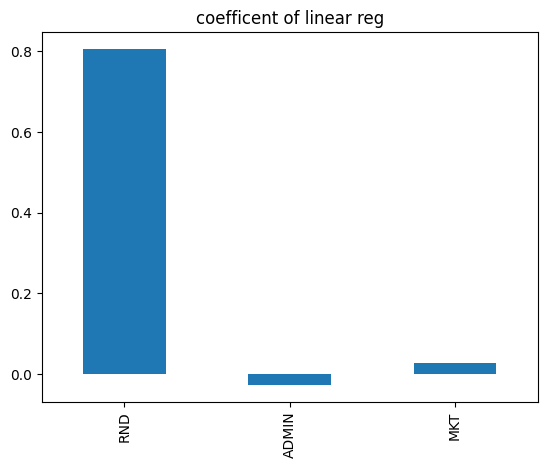

In [19]:
coef.plot(kind='bar', title='coefficent of linear reg')

1. if RND increases by 1000, PROFIT increase by 805.7
2. if ADMIN increase by 1000, PROFIT decrease by 26.8
3. if MKT increase by 1000, PROFIT increase by 27.2

Evaluate the model

In [20]:
#r2 score
model.score(x, y)

0.9507459940683246

predict the results for x

In [21]:
ypred = model.predict(x)
ypred[0:5]

array([[192521.25289008],
       [189156.76823227],
       [182147.2790962 ],
       [173696.70002553],
       [172139.51418327]])

In [23]:
y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


MSE, RMSE, MAE, MAPE, R2

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [25]:
mse =  mean_squared_error(y, ypred)
mse

78417126.01913083

In [26]:
rmse = mse**(1/2)
rmse

8855.34448901514

In [27]:
mae = mean_absolute_error(y, ypred)
mae

6471.4503961048085

In [28]:
from sklearn.metrics import mean_absolute_percentage_error
mape= mean_absolute_percentage_error(y, ypred)
mape

0.10601209160494125

In [29]:
from sklearn.metrics import r2_score
r2 = r2_score(y, ypred)
r2

0.9507459940683246

Above model is good and can be used for out of sample predictions

In [30]:
x.columns

Index(['RND', 'ADMIN', 'MKT'], dtype='object')

In [31]:
xnew = [[100000, 30000, 50000]]
model.predict(xnew)

array([[131250.62216964]])

In [32]:
xnew = [[100000, 30000, 70000]]
model.predict(xnew)

array([[131795.18346565]])

Higher Spend in RND more will the profit for given startup